# Выборка #12

In [1]:
%run init.py
%load_ext autoreload
%autoreload 2

### Обзор данных

In [2]:
dataset = Dataset(12)
dataset.summary()

+---------+-----------------------+----------------------+-------------+------------------+
| Выборка | Обучающая, # объектов | Тестовая, # объектов | # признаков | Доля класса 1, % |
+---------+-----------------------+----------------------+-------------+------------------+
|    12   |          1000         |        10000         |     100     |       36.5       |
+---------+-----------------------+----------------------+-------------+------------------+


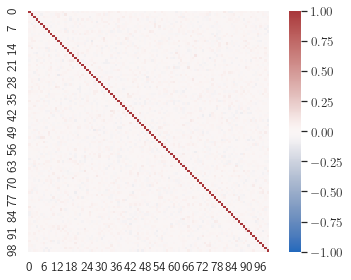

In [7]:
dataset.heatmap()

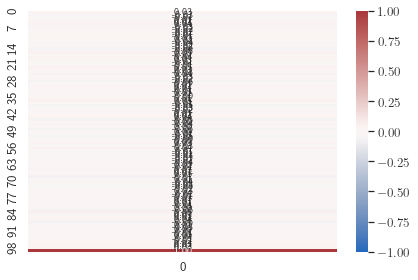

In [8]:
dataset.target_corr()

In [12]:
#make_histplot(dataset.df)

### Проверка нормальности признаков

Используем критерий Шапиро-Уилка

In [3]:
pvals = [shapiro(dataset.X1[i])[1] for i in range(dataset.n_features)]

Получим достигаемые уровни значимости для нулевой гипотезы: "Распределение признака является нормальным"

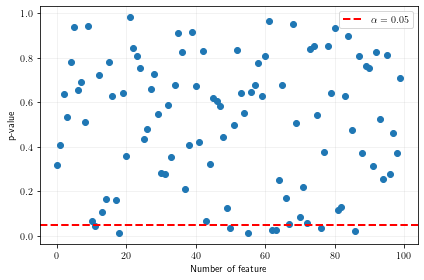

In [4]:
plt.plot(pvals, linestyle='None', marker='o')
plt.axhline(y=0.05, color='r', linestyle='dashed', label=r'$\alpha=0.05$')

plt.legend()
plt.xlabel('Number of feature')
plt.ylabel('p-value')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.savefig(f'./fig/dataset_{dataset.dataset_id}/shapiro.pdf', bbox_inches='tight')
plt.show()

In [13]:
pvals = np.array(pvals)
np.sum(pvals < 0.05) / len(pvals)

0.08

In [7]:
selected_columns = []

for index, p_value in enumerate(pvals):
    # Проверка условия
    if p_value > 0.05:
        # Добавление индекса столбца в список
        selected_columns.append(index)

### Logistic Regression

100%|██████████| 100/100 [01:02<00:00,  1.60it/s]


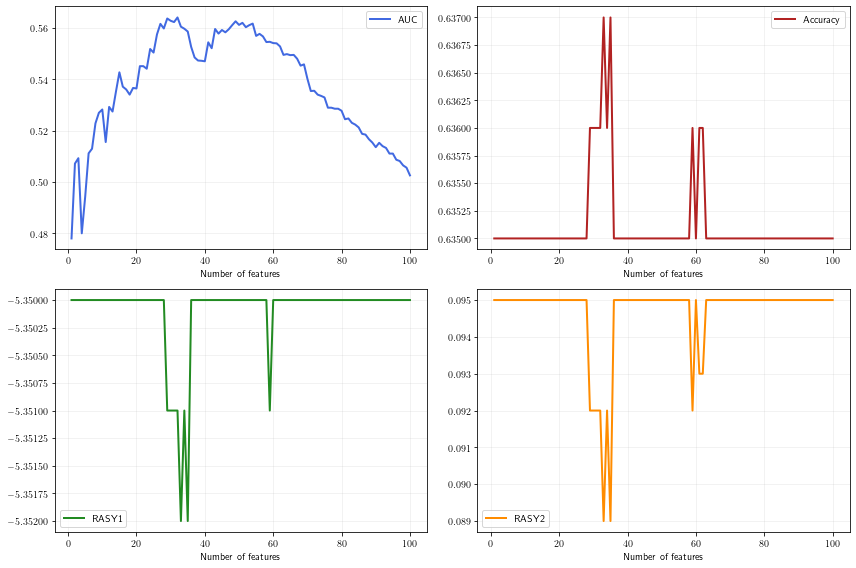

In [3]:
features_cols_lr = dataset.metrics_n_features_dependence(LogisticRegression(), save=False)

100%|██████████| 11/11 [00:12<00:00,  1.12s/it]


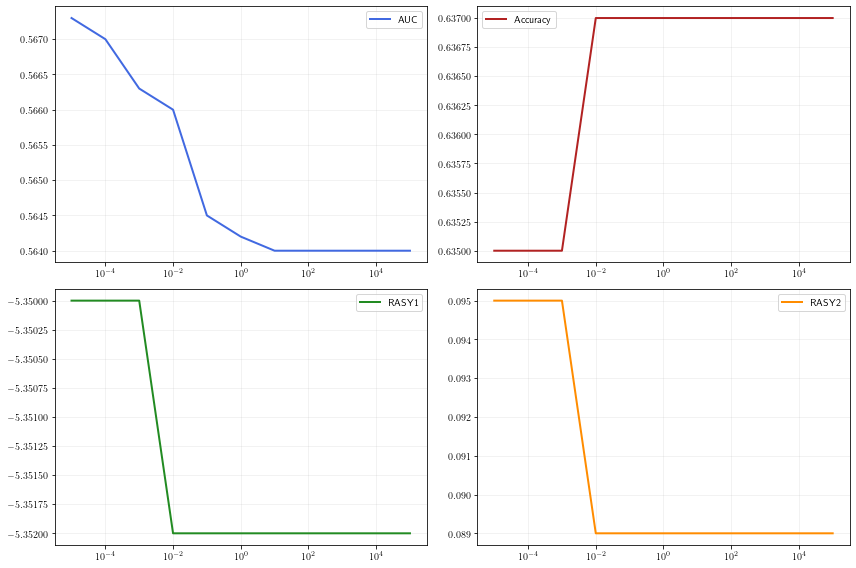

In [4]:
Cs_lr = LogisticRegressionValidate(dataset, features_cols_lr, np.logspace(-5, 5, 11), save=False)

### Наивный байес

100%|██████████| 100/100 [00:21<00:00,  4.61it/s]


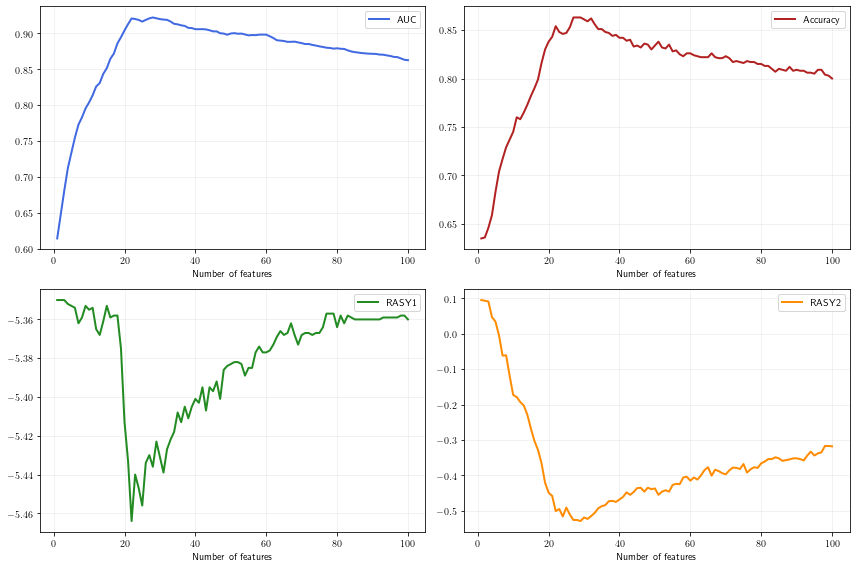

In [5]:
features_cols_gnb = dataset.metrics_n_features_dependence(GaussianNB(), save=True)

Оставим лишь признаки для которых не отвергнута гипотеза нормальности:

In [16]:
#dataset.X1_scaled = dataset.X1_scaled.iloc[:, selected_columns]
#dataset.n_features = len(selected_columns)

In [17]:
#dataset.X1_scaled.columns = range(dataset.n_features)

100%|██████████| 92/92 [00:30<00:00,  3.03it/s]


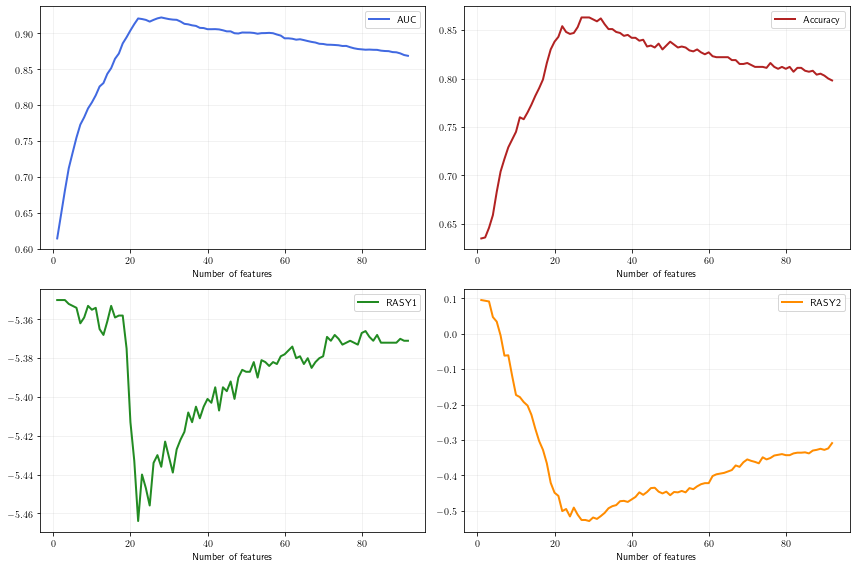

In [12]:
#features_cols_gnb = dataset.metrics_n_features_dependence(GaussianNB(), save=False)

Профита в этом нет, это связано с тем, что те признаки, на которых не принимается гипотеза являются неинформативными

### CatBoost

In [3]:
#fit_params = {"verbose" : False, "plot" : False}

In [4]:
#dataset.metrics_n_features_dependence(CatBoostClassifier(), fit_params=fit_params,
                                      #ks=[19])

In [2]:
#features_cb, cols_cb = dataset.feature_selection(n_cols=19)

In [1]:
#depths = [2, 3, 4, 5, 6, 7]
#CatBoostClassifierValidate(dataset, features_cb, depths)

### Saving aswers 

In [6]:
model_AUC = GaussianNB()
model_Accuracy = GaussianNB()
model_RASY1 = GaussianNB()
model_RASY2 = GaussianNB()
models = [model_AUC, model_Accuracy, model_RASY1, model_RASY2]

In [7]:
features_AUC, cols_AUC = features_cols_gnb['AUC']['features'], features_cols_gnb['AUC']['cols']
features_Accuracy, cols_Accuracy = features_cols_gnb['Accuracy']['features'], features_cols_gnb['Accuracy']['cols']
features_RASY1, cols_RASY1 = features_cols_gnb['RASY1']['features'], features_cols_gnb['RASY1']['cols']
features_RASY2, cols_RASY2 = features_cols_gnb['RASY2']['features'], features_cols_gnb['RASY2']['cols']
features_list = [features_AUC, features_Accuracy, features_RASY1, features_RASY2]
cols_list = [cols_AUC, cols_Accuracy, cols_RASY1, cols_RASY2]

In [8]:
t_Accuracy = features_cols_gnb['Accuracy']['t']
t_RASY1 = features_cols_gnb['RASY1']['t']
t_RASY2 = features_cols_gnb['RASY2']['t']
thresholds_list = [t_Accuracy, t_RASY1, t_RASY2]

In [9]:
dataset.save_ans(models, features_list, cols_list, thresholds_list)

In [10]:
print(f'{thresholds_list[0]:.2f}, {thresholds_list[1]:.2f}, {thresholds_list[2]:.2f}')

0.41, 0.64, 0.42


In [18]:
cols_list[3].shape

(29,)